<a href="https://colab.research.google.com/github/VirajThakur03/Predict-Password-strength-using-NLP/blob/main/NLP_password_strength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Collection

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import sqlite3

In [3]:
sq = sqlite3.connect(r"/content/drive/MyDrive/Colab Notebooks/password_data.sqlite")

In [4]:
data = pd.read_sql_query("SELECT * FROM Users",sq)

In [5]:
data.head(1)

,index,password,strength
0,0,zxe870819,1


In [6]:
data.shape

(100000, 3)

In [7]:
data.drop(["index"],axis=1,inplace=True)

In [8]:
data.head(1)

,password,strength
0,zxe870819,1


Data Cleaning

In [9]:
data.isnull().sum()

,0
password,0
strength,0


In [10]:
data.isnull().any()

,0
password,False
strength,False


In [11]:
data.duplicated().sum()

np.int64(0)

In [12]:
data.dtypes

,0
password,object
strength,int64


In [13]:
data["strength"]

,strength
0,1
1,1
2,1
3,2
4,1
...,...
99995,1
99996,1
99997,1
99998,1


In [14]:
data["strength"].unique()

array([1, 2, 0])

Data Analysis

In [15]:
data["password"].str.isnumeric()

,password
0,False
1,False
2,False
3,False
4,False
...,...
99995,False
99996,False
99997,False
99998,False


In [16]:
data[data["password"].str.isnumeric()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [17]:
data[data["password"].str.isupper()]

,password,strength
115,EYT63119,1
273,INSPIRON6,1
338,1A2S3D4F,1
367,13269123A,1
373,YAMAZAKI82,1
...,...,...
99590,V13000993J,1
99692,65925013ABC,1
99784,01EDD055,1
99893,1UPONYOU,1


In [18]:
data[data["password"].str.isalpha()]

,password,strength
267,PomarancaÇ,1
1380,smgodt,0
3198,cuado,0
4560,jelsz,0
6380,demsxp,0
7803,secret,0
9218,caballo,0
11555,mhe,0
11667,kreedo,0
13645,nõmlich,0


In [19]:
data[data["password"].str.isalnum()]

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
4,c443balg,1
5,16623670p,1
...,...,...
99995,obejofi215,1
99996,fmiopvxb64,1
99997,czvrbun38,1
99998,mymyxe430,1


In [20]:
data[data["password"].str.istitle()]

,password,strength
64,Hisanthoshjasika0,2
242,Therockrockbottom72,2
338,1A2S3D4F,1
367,13269123A,1
526,Csicskarozsika1,2
...,...,...
99168,1053815198M,1
99192,Alfranx05122023,2
99375,Kensington1956,2
99590,V13000993J,1


In [21]:
import string

In [22]:
special = string.punctuation

In [23]:
def special_char(row):
  for char in row:
    if char in special:
      return True
  return False

In [24]:
data["password"].apply(special_char)


,password
0,False
1,False
2,False
3,True
4,False
...,...
99995,False
99996,False
99997,False
99998,False


In [25]:
data[data["password"].apply(special_char)]

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


Applying Feature Egineering

In [26]:
data["length"]=data["password"].str.len()

In [27]:
data.columns

Index(['password', 'strength', 'length'], dtype='object')

In [28]:
password="shan065"

In [29]:
a = [char for char in password if char.islower()]
print(len(a))

4


In [30]:
def frequency_lower(row):
  return len([char for char in row if char.islower()])/len(row)

In [31]:
def frequency_upper(row):
  return len([char for char in row if char.isupper()])/len(row)

In [32]:
def frequency_number(row):
  return len([char for char in row if char.isnumeric()])/len(row)

In [33]:
def frequency_special(row):
  special=[]
  for char in row:
    if not char.isdigit() and not char.isalpha():
      special.append(char)
  return len(special)/len(row)

In [34]:
data["lower_frequency"]=np.round(data["password"].apply(frequency_lower),3)
data["upper_frequency"]=np.round(data["password"].apply(frequency_upper),3)
data["number_frequency"]=np.round(data["password"].apply(frequency_number),3)
data["special_frequency"]=np.round(data["password"].apply(frequency_special),3)

In [35]:
data.head(10)

,password,strength,length,lower_frequency,upper_frequency,number_frequency,special_frequency
0,zxe870819,1,9,0.333,0.0,0.667,0.000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000
2,soporte13,1,9,0.778,0.0,0.222,0.000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043
4,c443balg,1,8,0.625,0.0,0.375,0.000
5,16623670p,1,9,0.111,0.0,0.889,0.000
6,yj9q3f8p,1,8,0.625,0.0,0.375,0.000
7,180ZIRUVIcuFERy,2,15,0.200,0.6,0.200,0.000
8,djredd09,1,8,0.750,0.0,0.250,0.000
9,yin172015,1,9,0.333,0.0,0.667,0.000


In [39]:
data.columns

Index(['password', 'strength', 'length', 'lower_frequency', 'upper_frequency',
       'number_frequency', 'special_frequency'],
      dtype='object')

In [45]:
data[["length","strength"]].groupby(["strength"]).agg(["min","max","mean","median"])

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [49]:
column = ['length', 'lower_frequency', 'upper_frequency',
       'number_frequency', 'special_frequency']
for char in column:
  print(data[[char,"strength"]].groupby(["strength"]).agg(["min","max","mean","median"]))
  print("\n")

         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


         lower_frequency                        
                     min    max      mean median
strength                                        
0                    0.0  1.000  0.708050  0.714
1                    0.0  0.923  0.630067  0.667
2                    0.0  0.917  0.424679  0.400


         upper_frequency                        
                     min    max      mean median
strength                                        
0                    0.0  1.000  0.012872  0.000
1                    0.0  0.923  0.007915  0.000
2                    0.0  0.889  0.367633  0.429


         number_frequency                        
                      min    max      mean median
strength                                         
0                     

In [50]:
data.columns

Index(['password', 'strength', 'length', 'lower_frequency', 'upper_frequency',
       'number_frequency', 'special_frequency'],
      dtype='object')

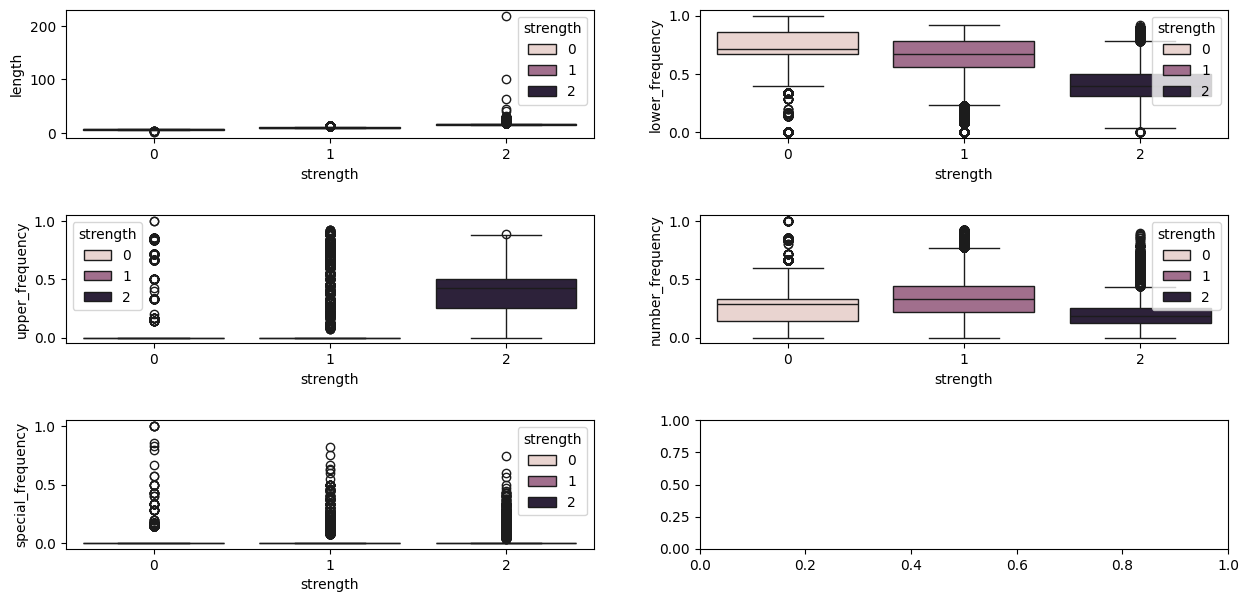

In [58]:
fig ,((ax1,ax2),(ax3,ax4),(ax5,ax6))=plt.subplots(3,2,figsize=(15,7))
sns.boxplot(x="strength",y="length",hue="strength",ax=ax1,data=data)
sns.boxplot(x="strength",y="lower_frequency",hue="strength",ax=ax2,data=data)
sns.boxplot(x="strength",y="upper_frequency",hue="strength",ax=ax3,data=data)
sns.boxplot(x="strength",y="number_frequency",hue="strength",ax=ax4,data=data)
sns.boxplot(x="strength",y="special_frequency",hue="strength",ax=ax5,data=data)
plt.subplots_adjust(hspace=0.6)
